In [278]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
import urllib, cStringIO
import urllib2
from PIL import Image
import pickle
import ftfy
from time import time
import re
import gzip

In [51]:
image_fetch(url)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ..., 
       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255,

In [47]:
url = 'http://www.zappos.com/images/z/4/0/2/7/0/1/4027013-3-4x.jpg'

In [48]:
response = requests.get(url)

In [40]:
sample = cStringIO.StringIO(urllib.urlopen(url).read())
img = Image.open(sample)

In [41]:
image_array = np.array(img)

In [42]:
image_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ..., 
       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255,

In [8]:
image_array.nbytes

8294400

In [9]:
np.array(img).shape

(1440, 1920, 3)

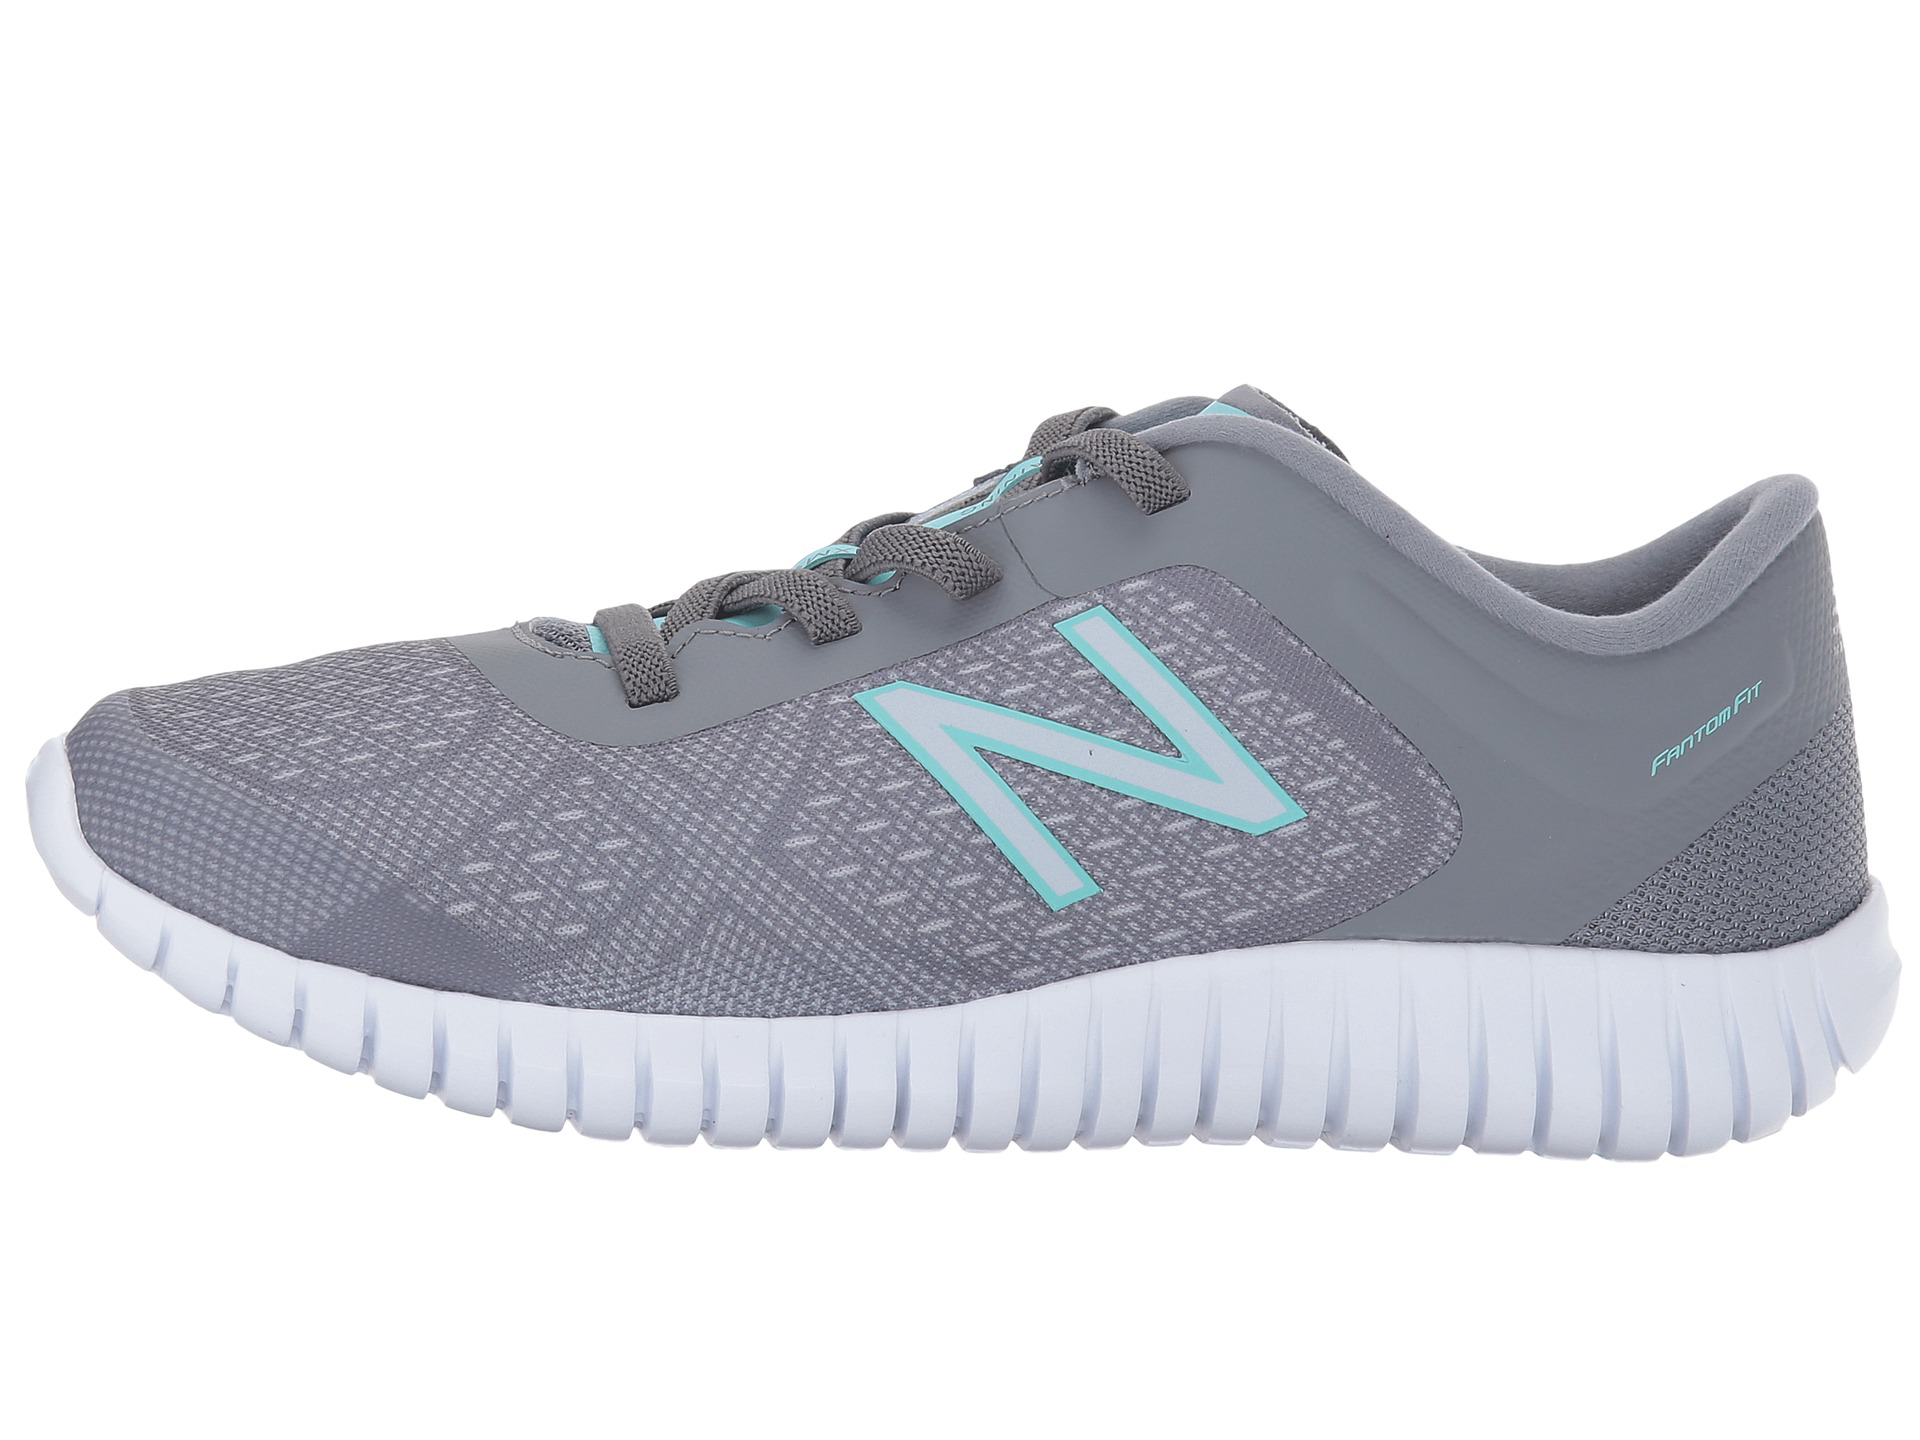

In [10]:
Image.fromarray(image_array)

In [217]:
zap = pd.read_csv('/users/Gene/Desktop/gzdsi7/Capstone/zappos_clean.csv')


In [218]:
zap.drop(['colorcode', 'shoe_link'], axis = 1, inplace=True)

In [219]:
zap.shoe_name = zap.shoe_name.apply(lambda x: unicode(x, "utf8", errors="ignore"))
#replace('[\$,]','',regex=True)

In [195]:
#zap.shoe_name = zap.shoe_name.apply(lambda x: x.replace('(','_'))
#zap.shoe_name = zap.shoe_name.apply(lambda x: x.replace(')','_'))
#zap.shoe_name = zap.shoe_name.apply(lambda x: x.replace('/','_'))
#zap.shoe_name = zap.shoe_name.apply(lambda x: x.replace('-','_'))
#zap.shoe_name = zap.shoe_name.apply(lambda x: x.replace('.','_'))
#zap.shoe_name = zap.shoe_name.apply(lambda x: x.replace("'",''))

In [220]:
zap.colorway = zap.colorway.astype(str)

In [221]:
zap.shoe_name = zap.shoe_name.apply(lambda x: x.replace(' ','_'))

In [222]:
zap.brand_name = zap.brand_name.apply(lambda x: x.replace(' ','_'))

In [223]:
zap.colorway = zap.colorway.apply(lambda x: x.replace(' ','_'))

In [266]:
a = "alexander/is/warm"

In [ ]:
row[0]

In [277]:
pd.Series(a).replace(to_replace=r'([//])', value="_",regex=True)[0]

'alexander is warm'

In [285]:
for index, row in zap.iterrows():
    #print row[0], row[1], row[2]
    
    print "{}".format(row[0].replace(r'[//]','_',regex=True))
    break
    #replace('[\$,]','',regex=True).astype(str)

TypeError: replace() takes no keyword arguments

In [281]:
def image_fetch(url):
    sample = cStringIO.StringIO(urllib.urlopen(url).read())
    img = Image.open(sample)
    image_array = np.array(img)
    return image_array

In [262]:
# iterate through each row in the df
def pickling(df):

    for index, row in df.iterrows():
        #print index, row
        shoe_list = []
        for i in row:
            if '.com' in i:
                shoe_list.append(image_fetch(i))
            else:
                shoe_list.append(i)
        file_name = "{}".format(row[0].replace('-','_').replace('.','') + "_" + row[1].replace("/",'_').replace('(','').replace(')','').replace('.','_').replace('-','_').replace("'",'').replace('+','').replace('&','') + "_"+ row[2].replace('/','_').replace('(','').replace(')',''))
        fileObject = open('dummy_file', 'wb')
        pickle.dump(shoe_list, fileObject)
        fileObject.close()
        to_bucket(file_name,'dummy_file','capstoneshoes')

    # iterate through the image links in variable called row
    # pull data from url
    # store as array
    # append to temp file array
    #once for loop is done save temp array to pickle file
    # prototype for single row
    #once successful add s3 func

In [263]:
import boto3

def to_bucket(f, dum, bucket):
    '''
    Write files to s3 bucket.

    INPUT: f - file to write
           bucket - bucket to write to
           write_path - path in bucket to write file 
    '''
    s3 = boto3.resource('s3')
    data = open(dum, 'rb')
    s3.Bucket(bucket).put_object(Key=f,Body=data)
    print "Success! {} added to {} bucket".format(f, bucket)


In [264]:
start = time()
pickling(zap)
end = time()
print end-start

Success! Nike_Flex_RN_2017_Black_Metallic_Hematite_Anthracite_Dark_Grey added to capstoneshoes bucket
Success! Nike_Flex_RN_2017_Gym_Blue_Black_Star_Blue_Photo_Blue added to capstoneshoes bucket
Success! Nike_Kids_Vapor_Varsity_Football_Little_Kid_Big_Kid_University_Red_White_Black_White added to capstoneshoes bucket


KeyboardInterrupt: 